In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

In [3]:
a = np.array([1,2,3,4,5])
a[-1]

5

# 4次Runge-Kutta法

In [2]:
def RungeKutta4(initial, time, model, F):
    """
    F :
        Forcing constant, to be used in Lorenz96
    kwargs : 
        modelに渡す x 以外の変数を指定
    """
    dt = time[1] - time[0]
    states = [initial]
    x = initial
    for t in time[:-1]:
        k1 = model(x, F)
        x1 = x + k1 * dt/2
        k2 = model(x1, F)
        x2 = x + k2 * dt/2
        k3 = model(x2, F)
        x3 = x + k3 * dt
        k4 = model(x3, F)
        x = x + (k1 + 2*k2 + 2*k3 + k4) * dt / 6
        states.append(x)
    states = np.stack(states)
    return states

# Lorenz-96

In [3]:
def Lorenz96(x0, F):
    x = np.zeros(x0.shape[0]+3)
    # 周期的なxの表現をつくる
    x[2:-1] = x0 # index 2がもとのxのindex 0, index -2がもとのxのN
    x[:2] = x0[-2:] # index 0,1 がもとのxのindex N-1, N
    x[-1] = x0[0] # index -1 がもとのxのindex 0
    
    dxdt = (x[3:] - x[:-3]) * x[1:-2] - x[2:-1] + F
    return dxdt

def L96(x, F, N=40):
    """
    Lorenz 96 model with constant forcing.
    Cited by "https://en.wikipedia.org/wiki/Lorenz_96_model"
    
    Parameters
    ----------
    x : 
        variables
    F :
       Forcing constant 
    N : int
        number of sites
    """
    # Setting up vector
    d = np.zeros(N)
    # Loops over indices (with operations and Python underflow indexing handling edge cases)
    for i in range(N):
        d[i] = (x[(i + 1) % N] - x[i - 2]) * x[i - 1] - x[i] + F
    return d

# 実験

## F=7

### x[0]の時間変化

Text(0, 0.5, 'x0')

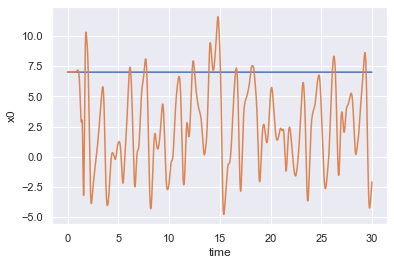

In [4]:
N = 40
F = 7.0
time = np.arange(0.0, 30.0, 0.01)

x0 = np.full(N, F) # 初期値

# xs0 = RungeKutta4(x0, time, Lorenz96, F=F)
xs0 = RungeKutta4(x0, time, L96, F=F)

# 初期値をわずかに変えたもの
x1 = np.full(N, F)
x1[19] += F * 0.001
xs1 = RungeKutta4(x1, time, Lorenz96, F=F)

plt.plot(time, xs0[:,0])
plt.plot(time, xs1[:,0])
plt.xlabel('time')
plt.ylabel('x0')

### x全体の時間変化

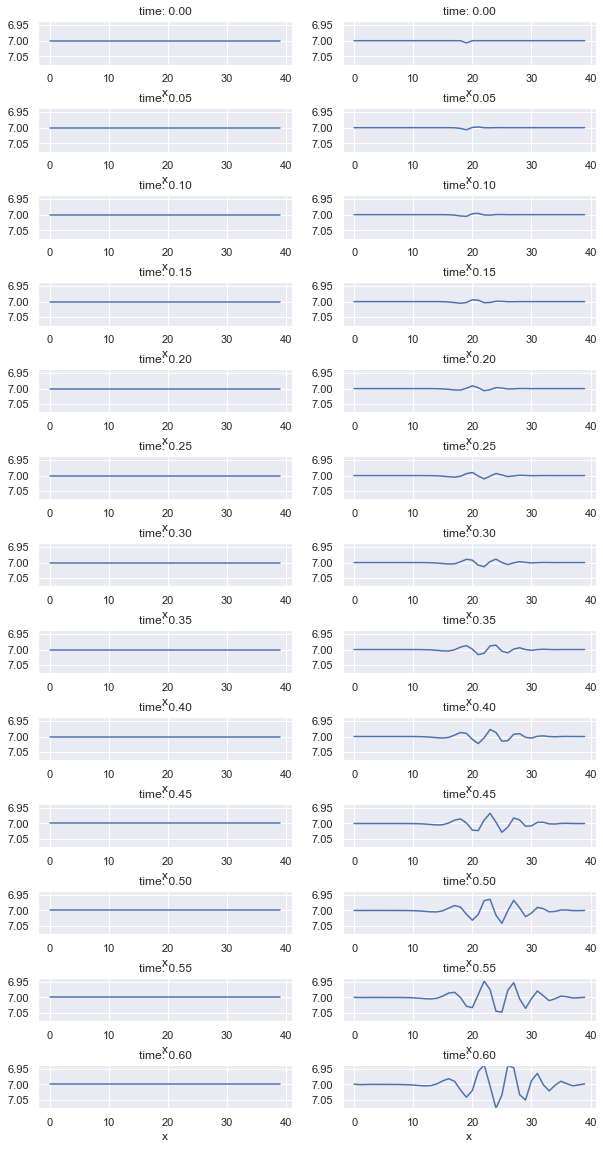

In [5]:
time = np.arange(0.0, 0.61, 0.05)

x0 = np.full(N, F) # 初期値
xs0 = RungeKutta4(x0, time, Lorenz96, F=F)

# 初期値をわずかに変えたもの
x1 = np.full(N, F)
x1[19] += F * 0.001
xs1 = RungeKutta4(x1, time, Lorenz96, F=F)

xmax = np.max(xs1)
xmin = np.min(xs1)

fig, ax = plt.subplots(time.shape[0], 2, figsize=(10, 20))
for i,t in enumerate(time):
    ax[i,0].plot(xs0[i,:])
    ax[i,0].set_ylim(xmax,xmin)
    ax[i,0].set_xlabel('x')
    ax[i,0].set_title('time: {:.2f}'.format(t))
    ax[i,1].plot(xs1[i,:])
    ax[i,1].set_ylim(xmax,xmin)
    ax[i,1].set_xlabel('x')
    ax[i,1].set_title('time: {:.2f}'.format(t))
plt.subplots_adjust(wspace=0.2, hspace=1)

## F=8

### x[0]の時間変化

Text(0, 0.5, 'x0')

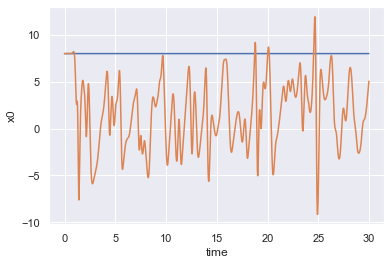

In [6]:
N = 40
F = 8.0
time = np.arange(0.0, 30.0, 0.01)

x0 = np.full(N, F) # 初期値
xs0 = RungeKutta4(x0, time, Lorenz96, F=F)

# 初期値をわずかに変えたもの
x1 = np.full(N, F)
x1[19] += F * 0.001
xs1 = RungeKutta4(x1, time, Lorenz96, F=F)

plt.plot(time, xs0[:,0])
plt.plot(time, xs1[:,0])
plt.xlabel('time')
plt.ylabel('x0')

### x全体の時間変化

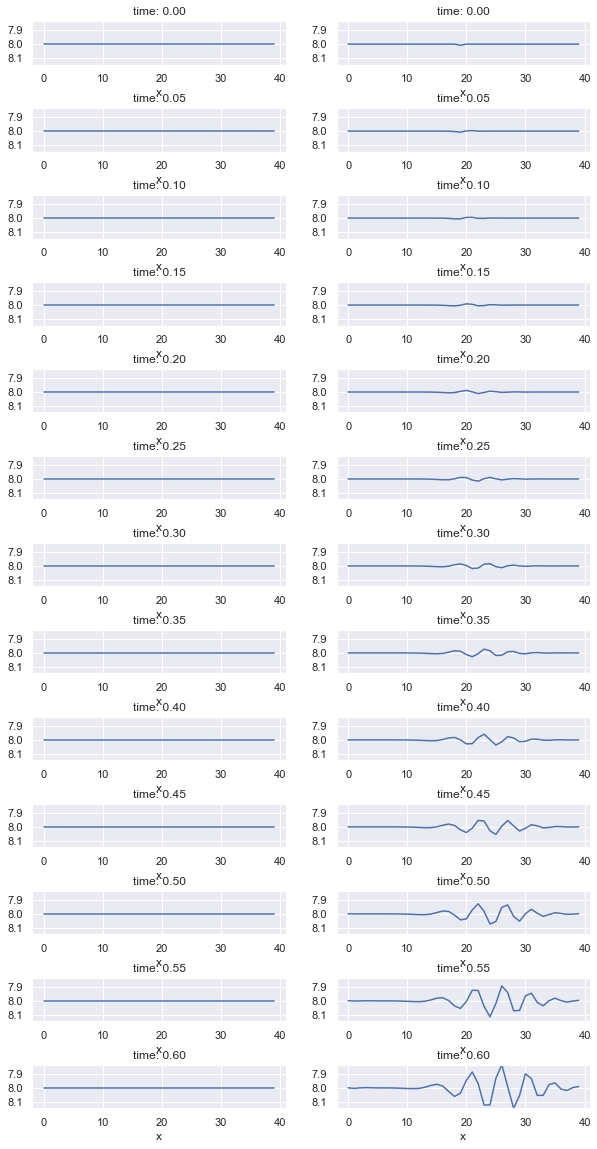

In [7]:
time = np.arange(0.0, 0.61, 0.05)

x0 = np.full(N, F) # 初期値
xs0 = RungeKutta4(x0, time, Lorenz96, F=F)

# 初期値をわずかに変えたもの
x1 = np.full(N, F)
x1[19] += F * 0.001
xs1 = RungeKutta4(x1, time, Lorenz96, F=F)

xmax = np.max(xs1)
xmin = np.min(xs1)

fig, ax = plt.subplots(time.shape[0], 2, figsize=(10, 20))
for i,t in enumerate(time):
    ax[i,0].plot(xs0[i,:])
    ax[i,0].set_ylim(xmax,xmin)
    ax[i,0].set_xlabel('x')
    ax[i,0].set_title('time: {:.2f}'.format(t))
    ax[i,1].plot(xs1[i,:])
    ax[i,1].set_ylim(xmax,xmin)
    ax[i,1].set_xlabel('x')
    ax[i,1].set_title('time: {:.2f}'.format(t))
plt.subplots_adjust(wspace=0.2, hspace=1)

## F=9

### x[0]の時間変化

Text(0, 0.5, 'x0')

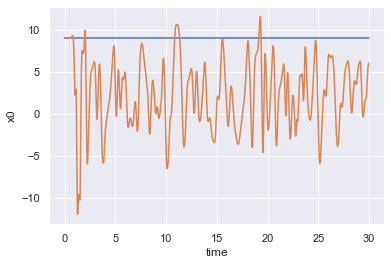

In [8]:
N = 40
F = 9.0
time = np.arange(0.0, 30.0, 0.01)

x0 = np.full(N, F) # 初期値
xs0 = RungeKutta4(x0, time, Lorenz96, F=F)

# 初期値をわずかに変えたもの
x1 = np.full(N, F)
x1[19] += F * 0.001
xs1 = RungeKutta4(x1, time, Lorenz96, F=F)

plt.plot(time, xs0[:,0])
plt.plot(time, xs1[:,0])
plt.xlabel('time')
plt.ylabel('x0')

### x全体の時間変化

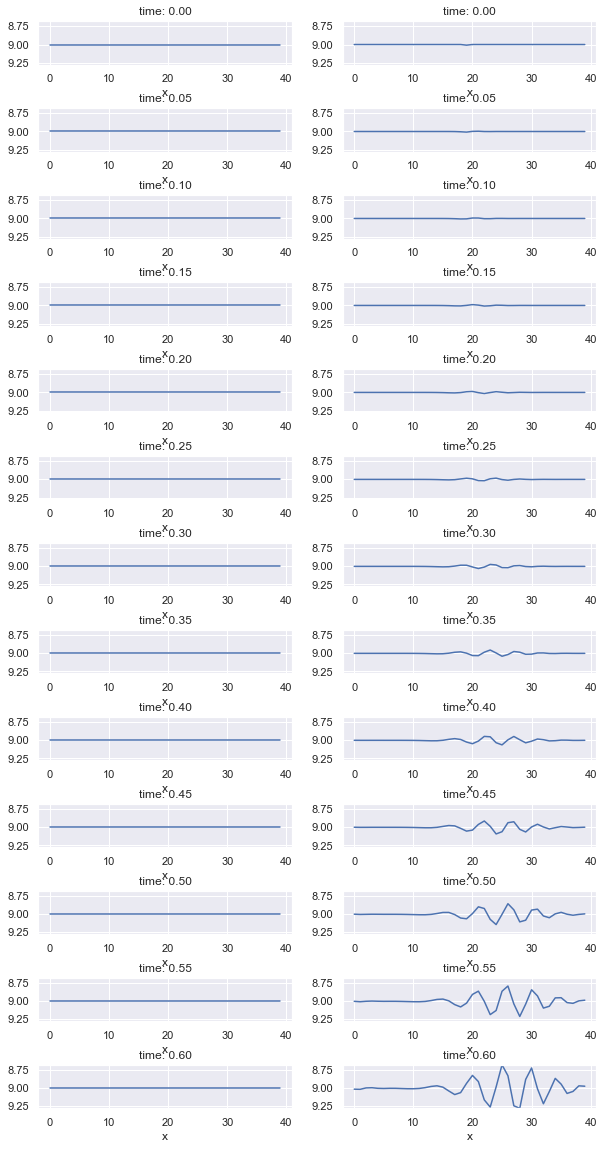

In [9]:
time = np.arange(0.0, 0.61, 0.05)

x0 = np.full(N, F) # 初期値
xs0 = RungeKutta4(x0, time, Lorenz96, F=F)

# 初期値をわずかに変えたもの
x1 = np.full(N, F)
x1[19] += F * 0.001
xs1 = RungeKutta4(x1, time, Lorenz96, F=F)

xmax = np.max(xs1)
xmin = np.min(xs1)

fig, ax = plt.subplots(time.shape[0], 2, figsize=(10, 20))
for i,t in enumerate(time):
    ax[i,0].plot(xs0[i,:])
    ax[i,0].set_ylim(xmax,xmin)
    ax[i,0].set_xlabel('x')
    ax[i,0].set_title('time: {:.2f}'.format(t))
    ax[i,1].plot(xs1[i,:])
    ax[i,1].set_ylim(xmax,xmin)
    ax[i,1].set_xlabel('x')
    ax[i,1].set_title('time: {:.2f}'.format(t))
plt.subplots_adjust(wspace=0.2, hspace=1)

# アニメーション

In [4]:
from matplotlib import animation
from IPython.display import HTML

In [6]:
# init
time = np.arange(0.0, 0.61, 0.05)
# x0 = np.full(N, F) # 初期値
# xs0 = RungeKutta4(x0, time, Lorenz96, F=F)
# 初期値をわずかに変えたもの
N = 40
F = 9.0
x1 = np.full(N, F)
x1[19] += F * 0.001

# xmax = np.max(xs1)
# xmin = np.min(xs1)
#     fig, ax = plt.subplots(time.shape[0], 2, figsize=(10, 20))
# fig, ax = plt.subplots()
# xdata, ydata = [], []
# ln, = plt.plot([], [])
# ax.set_xlim(0, N)
# ax.set_ylim(F-0.5, F+0.5)

def init(N=N, F=F):
    plt.xlim(0, N)
    plt.ylim(F-0.5, F+0.5)
    return ln,
    

def RK4_plot(fargs):
    ax.cla() # ax をクリア
#     ln = init()
    x = fargs
    ln.set_data(x)
#     ax[i,1].set_ylim(xmax,xmin)
#     ax[i,1].set_xlabel('x')
#     ax[i,1].set_title('time: {:.2f}'.format(t))
#     plt.subplots_adjust(wspace=0.2, hspace=1)

def RK4_yield(initial=x1, time=time, model=L96, F=F) -> np.ndarray:
    """
    F :
        Forcing constant, to be used in Lorenz96
    kwargs : 
        modelに渡す x 以外の変数を指定
    """
    dt = time[1] - time[0]
    states = [initial]
    x = initial
    for i, t in enumerate(time[:-1]):
        if i == 0:
            yield x
        k1 = model(x, F)
        x1 = x + k1 * dt/2
        k2 = model(x1, F)
        x2 = x + k2 * dt/2
        k3 = model(x2, F)
        x3 = x + k3 * dt
        k4 = model(x3, F)
        x = x + (k1 + 2*k2 + 2*k3 + k4) * dt / 6
        yield x
        
# ani = FuncAnimation(fig, RK4_plot, RK4_yield, init_func=init, blit=True, interval=50)
# ani = FuncAnimation(fig, RK4_plot, RK4_yield, blit=True, interval=50)
# HTML(ani.to_jshtml())

In [32]:
unit = 0.05
time = np.arange(0.0, 0.61, unit)
N = 40
F = [2.0, 6.0, 9.0]
x1 = np.full(N, F)
x1[19] += F * 0.001
%matplotlib widget

# fig, ax = plt.subplots()
fig, ax = plt.subplots(len(F))
# ax.set_xlim(0, N)
# ax.set_ylim(F-0.5, F+0.5)
lines = []
for i, x in enumerate(RK4_yield(x1, time, L96, F)):
    for j in 
    plt.ylim(8.5, 9.5)
    line = ax[0].plot(x, color='r')
    
#     plt.plot(x, color='r')
#     plt.show()
#     plt.show()
#     plt.plot(xs1[i,:])
#     plt.set_ylim(xmax,xmin)
#     plt.set_xlabel('x')
#     plt.title('time(unit): {:.2f}'.format(i))
    lines.append(line)
    
ani = animation.ArtistAnimation(fig, lines, interval=300)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

TypeError: 'AxesSubplot' object is not subscriptable